In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv("cleaned_merge_heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,label
0,63,1,4,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,3,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,1,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['cp'].value_counts()

,count
cp,
1,786
3,535
2,313
4,252


In [5]:
x = df.drop(columns=['label'])
y = df['label']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5333 - loss: 0.6841 - val_accuracy: 0.7318 - val_loss: 0.5613
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7308 - loss: 0.5574 - val_accuracy: 0.7781 - val_loss: 0.4803
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7646 - loss: 0.5000 - val_accuracy: 0.7881 - val_loss: 0.4551
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7850 - loss: 0.4693 - val_accuracy: 0.7848 - val_loss: 0.4335
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8222 - loss: 0.4185 - val_accuracy: 0.7980 - val_loss: 0.4138
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8327 - loss: 0.3938 - val_accuracy: 0.8179 - val_loss: 0.4016
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8403 - loss: 0.3718 - val_accuracy: 0.8212 - val_loss: 0.3769
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8353 - loss: 0.3614 - val_accuracy: 0.8278 - v

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.1940 
Test Loss: 0.18644607067108154
Test Accuracy: 0.9523809552192688


In [11]:
# Evaluasi model pada data testing
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Threshold 0.5 untuk klasifikasi biner

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [12]:
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)

Accuracy: 0.9524
Error Rate: 0.0476
Precision: 0.9524
Recall: 0.9524
F1-Score: 0.9524
Specificity: 0.9435

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       177
           1       0.95      0.96      0.96       201

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378


Confusion Matrix:
[[167  10]
 [  8 193]]


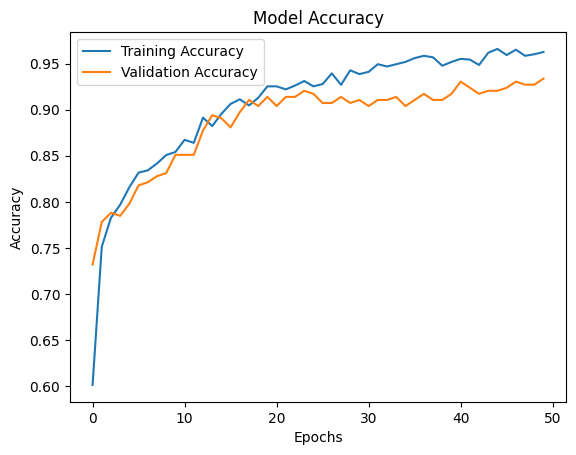

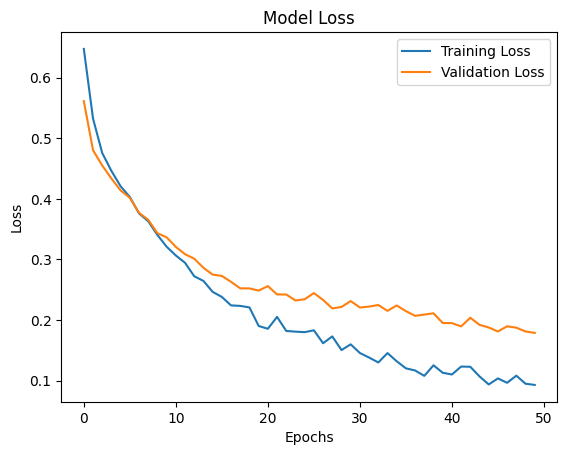

In [13]:
def display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix):
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {1 - accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)

display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix)

import matplotlib.pyplot as plt

# Ambil data history selama pelatihan
history_dict = history.history

# Plot akurasi
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot kerugian
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.save("heart-model.h5")

In [16]:
# Install tensorflowjs

!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [1]:
# mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras heart-model.h5 tfjs_model

2024-12-07 03:42:43.704348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733542963.775961   24829 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733542963.789677   24829 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 03:42:43.831308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed